<h1><center><font color='blue'>Red neuronal profunda: Distintas funciones de activacion sobre el dataset del MNIST</font></center></h1>


<h3>Objetivos<h3>    
<h5> 1. Definir varias redes neuronales, funciones de criterio y optimizadores</h5>
<h5> 2. Testear la sigmoide, tanh y relu </h5>
<h5> 3. Analisis de resultados</h5>     


<h2>Tabla de contenido</h2>
<p> Testearemos distintas funciones de activación sobre el dataset del MNIST para una red con 2 capas ocultas</p>

<ul>
    <li><a href="#Model">Módulo red neuronal y función de entrenamiento</a></li>
    <li><a href="#Makeup_Data">Crear algunos datos</a></li>
    <li><a href="#Train">Definir varias redes neuronales, funciones de criterio y optimizador</a></li>
    <li><a href="#Test">Testear la sigmoide, tanh y relu</a></li>
    <li><a href="#Result">Análisis de resultados</a></li>
</ul>

<hr>


In [1]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [2]:
# Import the libraries we need for this lab

# Using the following line code to install the torchvision library
# !conda install -y torchvision

import torch 
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import torch.nn.functional as F
import matplotlib.pylab as plt
import numpy as np
torch.manual_seed(2)

<!--Empty Space for separating topics-->


<h2 id="Model">Módulo red neuronal y función de entrenamiento</h2> 


Definimos la red neuronal, tendrá 2 capas ocultas:

<img src="https://ibm.box.com/shared/static/5wtclahun0f70qlwkn2kxzh3amnbq4zg.png" width="200" alt="Neural Network Model" />


In [3]:
# Create the model class using sigmoid as the activation function

class Net(nn.Module):
    
    # Constructor
    def __init__(self, D_in, H1, H2, D_out):
        super(Net, self).__init__()
        self.linear1 = nn.Linear(D_in, H1)
        self.linear2 = nn.Linear(H1, H2)
        self.linear3 = nn.Linear(H2, D_out)
    
    # Prediction
    def forward(self,x):
        x = torch.sigmoid(self.linear1(x)) 
        x = torch.sigmoid(self.linear2(x))
        x = self.linear3(x)
        return x

Ahora usamos tanh como función de activación:


In [4]:
# Create the model class using Tanh as a activation function

class NetTanh(nn.Module):
    
    # Constructor
    def __init__(self, D_in, H1, H2, D_out):
        super(NetTanh, self).__init__()
        self.linear1 = nn.Linear(D_in, H1)
        self.linear2 = nn.Linear(H1, H2)
        self.linear3 = nn.Linear(H2, D_out)
    
    # Prediction
    def forward(self, x):
        x = torch.tanh(self.linear1(x))
        x = torch.tanh(self.linear2(x))
        x = self.linear3(x)
        return x

Ahora usamos Relu como función de activación:


In [5]:
# Create the model class using Relu as a activation function

class NetRelu(nn.Module):
    
    # Constructor
    def __init__(self, D_in, H1, H2, D_out):
        super(NetRelu, self).__init__()
        self.linear1 = nn.Linear(D_in, H1)
        self.linear2 = nn.Linear(H1, H2)
        self.linear3 = nn.Linear(H2, D_out)
    
    # Prediction
    def forward(self, x):
        x = torch.relu(self.linear1(x))  
        x = torch.relu(self.linear2(x))
        x = self.linear3(x)
        return x

Definimos una función para entrenar el modelo. Retorna un diccionario que almacena la pérdida de entrenamiento y la precisión sobre los datos de validación.


In [6]:
# Train the model

def train(model, criterion, train_loader, validation_loader, optimizer, epochs=100):
    i = 0
    useful_stuff = {'training_loss': [], 'validation_accuracy': []}  
    
    for epoch in range(epochs):
        for i, (x, y) in enumerate(train_loader):
            optimizer.zero_grad()
            z = model(x.view(-1, 28 * 28))
            loss = criterion(z, y)
            loss.backward()
            optimizer.step()
            useful_stuff['training_loss'].append(loss.data.item())
        
        correct = 0
        for x, y in validation_loader:
            z = model(x.view(-1, 28 * 28))
            _, label = torch.max(z, 1)
            correct += (label == y).sum().item()
    
        accuracy = 100 * (correct / len(validation_dataset))
        useful_stuff['validation_accuracy'].append(accuracy)
    
    return useful_stuff

<!--Empty Space for separating topics-->


<h2 id="Makeup_Data">Crear algunos datos</h2> 


Cargamos el dataset de entrenamiento:


In [8]:
# Create the training dataset

train_dataset = dsets.MNIST(root='/data/', train=True, download=True, transform=transforms.ToTensor())

Cargamos el dataset de validación:


In [10]:
# Create the validating dataset

validation_dataset = dsets.MNIST(root='/data/', train=False, download=True, transform=transforms.ToTensor())

Creamos la función de criterio:  


In [11]:
# Create the criterion function

criterion = nn.CrossEntropyLoss()

Creamos los cargadores de datos:


In [12]:
# Create the training data loader and validation data loader object

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=2000, shuffle=True)
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=5000, shuffle=False)

<!--Empty Space for separating topics-->


<h2 id="Train">Definimos la red neuronal, función de criterio, optimizador y entrenamos el modelo</h2> 


Parámetros para el modelo: 


In [13]:
# Set the parameters for create the model

input_dim = 28 * 28
hidden_dim1 = 50
hidden_dim2 = 50
output_dim = 10

Cantidad de epochs:


In [14]:
# Set the number of iterations

cust_epochs = 10

<!--Empty Space for separating topics-->


<h2 id="Test">Testeamos la Sigmoide ,Tanh y Relu</h2> 


Entrenamos la red usando la sigmoide:


In [15]:
# Train the model with sigmoid function

learning_rate = 0.01
model = Net(input_dim, hidden_dim1, hidden_dim2, output_dim) # Net se construye con la sigmoide
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
training_results = train(model, criterion, train_loader, validation_loader, optimizer, epochs=cust_epochs)

Entrenamos usando tanh:


In [16]:
# Train the model with tanh function

learning_rate = 0.01
model_Tanh = NetTanh(input_dim, hidden_dim1, hidden_dim2, output_dim)
optimizer = torch.optim.SGD(model_Tanh.parameters(), lr=learning_rate)
training_results_tanch = train(model_Tanh, criterion, train_loader, validation_loader, optimizer, epochs=cust_epochs)

Entrenamos usando Relu:


In [18]:
# Train the model with relu function

learning_rate = 0.01
modelRelu = NetRelu(input_dim, hidden_dim1, hidden_dim2, output_dim)
optimizer = torch.optim.SGD(modelRelu.parameters(), lr=learning_rate)
training_results_relu = train(modelRelu, criterion, train_loader, validation_loader, optimizer, epochs=cust_epochs)

<!--Empty Space for separating topics-->


<h2 id="Result">Análisis de resultados</h2> 


Comparamos la pérdida de entrenamiento para cada función de activación:


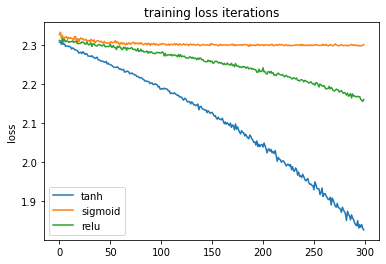

In [19]:
# Compare the training loss

plt.plot(training_results_tanch['training_loss'], label='tanh')
plt.plot(training_results['training_loss'], label='sigmoid')
plt.plot(training_results_relu['training_loss'], label='relu')
plt.ylabel('loss')
plt.title('training loss iterations')
plt.legend()

Comparamos la pérdida de validación para cada función de activación:


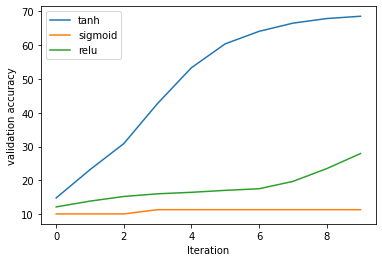

In [20]:
# Compare the validation loss

plt.plot(training_results_tanch['validation_accuracy'], label = 'tanh')
plt.plot(training_results['validation_accuracy'], label = 'sigmoid')
plt.plot(training_results_relu['validation_accuracy'], label = 'relu') 
plt.ylabel('validation accuracy')
plt.xlabel('Iteration')   
plt.legend()